Exam - Final Test

In [1]:
import pandas as pd #untuk manipulasi data
import numpy as np #untuk komputasi numerik
import matplotlib.pyplot as plt #untuk visualisasi
import plotly.express as px #untuk visualiasi

Nomor 6

Pada sebuah dataframe dengan 40 Baris, terdapat kolom bernama Grade yang berisikan 5 values berikut A, B, C, D dan E, dimana tiap values memiliki proporsi A: 50% baris, B:20% baris, C:20% baris, D:5% baris dan E:5% baris. Ada berapa baris output dari code berikut:

dataframe.groupby(['Grade']).head(4)

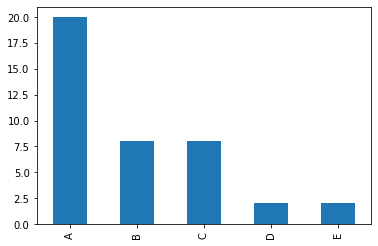

In [2]:
baris = 40
proporsi = {'A':50, 'B':20, 'C':20, 'D':5, 'E':5}

df6 = pd.DataFrame(columns=['Grade'])

for key in proporsi:
  for i in range(int(proporsi[key]/100*baris)):
    df6 = df6.append({'Grade':key}, ignore_index=True)

df6['Grade'].value_counts().plot.bar()
plt.show()

In [3]:
print(df6.groupby(['Grade']).head(4))

   Grade
0      A
1      A
2      A
3      A
20     B
21     B
22     B
23     B
28     C
29     C
30     C
31     C
36     D
37     D
38     E
39     E


In [13]:
print(df6.groupby(['Grade']).head(4).shape[0])

16


Jawab : 16

In [6]:
df = pd.read_csv('insurance.csv')
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Nomor 7

Suatu perusahaan asuransi ingin menghitung berapa banyak nasabah yang berpotensi melakukan klaim. Nasabah yang berpotensi melakukan klaim adalah nasabah perempuan yang merokok. Berapa banyak nasabah dengan ciri-ciri tersebut?

In [12]:
potensi_klaim = df[(df.sex == 'female') & (df.smoker == 'yes')]
print(potensi_klaim.shape[0])

115


In [16]:
display(potensi_klaim)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
23,34,female,31.920,1,yes,northeast,37701.87680
58,53,female,22.880,1,yes,southeast,23244.79020
64,20,female,22.420,0,yes,northwest,14711.74380
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1323,42,female,40.370,2,yes,southeast,43896.37630


In [11]:
df_x = df.groupby(by=["sex","smoker"]).size().reset_index(name="counts")
px.bar(data_frame=df_x, x="sex", y="counts", color="smoker", barmode="group")

Jawab : 115

Nomor 8

Berdasarkan ciri-ciri nasabah di pertanyaan sebelumnya, berapa rata-rata biaya yang harus disiapkan perusahaan asuransi untuk membayarkan klaim nasabah-nasabah tersebut?

In [14]:
print(potensi_klaim.charges.mean())

30678.996276260867


Jawab : 30678.9962

Nomor 9

Anggi dari perusahaan asuransi ingin mengunjungi nasabah yang berusia 64 tahun dan memiliki 1 orang anak. Bantulah Anggi untuk menemukan dimana wilayah tempat tinggal nasabah tersebut?

In [15]:
wil_anggi = df.loc[(df.age == 64) & (df.children == 1)]
print(wil_anggi)

     age     sex    bmi  children smoker     region      charges
62    64    male  24.70         1     no  northwest  30166.61817
328   64  female  33.80         1    yes  southwest  47928.03000
418   64    male  39.16         1     no  southeast  14418.28040


In [17]:
display(wil_anggi)

,age,sex,bmi,children,smoker,region,charges
62,64,male,24.70,1,no,northwest,30166.61817
328,64,female,33.80,1,yes,southwest,47928.03000
418,64,male,39.16,1,no,southeast,14418.28040


In [18]:
print(wil_anggi.region.nunique())

3


In [19]:
print(wil_anggi.region.unique())

['northwest' 'southwest' 'southeast']


Jawab : Northwest, Southwest, Southeast

Nomor 10

Berapa rata-rata body mass index (bmi) untuk nasabah yang berada di wilayah yang mengandung kata "north"?

In [22]:
print(df[df.region.str.contains('north')])

      age     sex     bmi  children smoker     region      charges
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
7      37  female  27.740         3     no  northwest   7281.50560
8      37    male  29.830         2     no  northeast   6406.41070
9      60  female  25.840         0     no  northwest  28923.13692
...   ...     ...     ...       ...    ...        ...          ...
1326   42  female  32.870         0     no  northeast   7050.02130
1328   23  female  24.225         2     no  northeast  22395.74424
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1337   61  female  29.070         0    yes  northwest  29141.36030

[649 rows x 7 columns]


In [20]:
print(df[df.region.str.contains('north')].bmi.mean())

29.186664098613257


Jawab : 29.186

Nomor 11

Bagi nasabah laki-laki perokok dengan usia lebih dari 50 tahun, jika dibuat kolom baru dengan nilai bmi - 1.5, maka berapa rata-rata bmi_baru tersebut?

In [25]:
male_smoker = df[(df.sex == 'male') & (df.smoker == 'yes') & (df.age > 50)]
male_smoker['bmi_baru'] = male_smoker['bmi'] - 1.5
male_smoker.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,sex,bmi,children,smoker,region,charges,bmi_baru
39,60,male,39.900,0,yes,southwest,48173.36100,38.400
55,58,male,36.955,2,yes,northwest,47496.49445,35.455
92,59,male,29.830,3,yes,northeast,30184.93670,28.330
98,56,male,19.950,0,yes,northeast,22412.64850,18.450
109,63,male,35.090,0,yes,southeast,47055.53210,33.590


In [26]:
print(male_smoker.bmi_baru.mean())

30.6904054054054


Jawab : 30.690